In [1]:
# Load required packages

from __future__ import print_function, division
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
import scipy
from statistics import mean

In [2]:
# Load pickled data

dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [3]:
# Wavelength, Flux and Uncertainty arrays for supernova 'sn2004gq'.

wvl = dataset15["sn2009iz"].wavelengths
y_11hs = dataset15["sn2009iz"].data
flux = y_11hs.astype('float64')
uncer = dataset15["sn2009iz"].smooth_uncertainty['Ph12.9']

In [4]:
# For log spaced wavelength bin centers.
# The function takes wavelength, flux and uncertainty arrays as input 
# and gives back the new wavelength, flux and uncertainty arrays of the reduced resolution spectrum.

def binspectraint(wvl, flux, uncer, N):
    wvllog = np.log(wvl)
    nw = len(wvllog)
    nbins = float(nw)/N
    rembin = int(nbins)
    rembin2 = rembin*N
    unpairedbins = nw - rembin2
    if float(nbins).is_integer():
        k = (0, 0)
    else:
        if (unpairedbins % 2) == 0:
            k = (int(unpairedbins/2), int(unpairedbins/2))
        else:
            k = (int(unpairedbins/2), int(unpairedbins/2+1))
    l = k[0]
    m = k[1]
    wnew = np.exp(np.array([wvllog[i:i+N].sum()/N for i in range(0+l,len(wvllog)-m,N)]))
    fnew = np.array([flux[i:i+N].sum() for i in range(0+l,len(flux)-m,N)])
    uncernew = np.array([np.sqrt(np.sum(np.square(uncer[i:i+N]))) for i in range(0+l,len(uncer)-m,N)])
    return wnew, fnew, uncernew

In [9]:
# Function that reduces the resolution of a given spectrum by any non-integer number N 
# for log spaced wavelength bin centers. It takes wavelength, flux and uncertainty arrays as 
# input and gives back the new wavelength, flux and uncertainty arrays of the reduced resolution spectrum.

def nonintbinspectra(wvl, flux, uncer, N):
    wvllog = np.log(wvl)
    N1 = int(N)
    N3 = int(N)
    n = N - N1
    n0 = N - N1
    N2 = int(np.ceil(N))
    i = 0
    k = 0
    obl = wvllog[i+1] - wvllog[i]
    obr = float(obl)/2
    nbl = obl*N
    nbr = float(nbl)/2
    brdiff = nbr - obr
    newbins = []
    newflux = []
    newuncer = []
    nbnctr = wvllog[i] + brdiff
    newbins.append(np.exp(nbnctr))
    newflux.append(flux[i:i + N1].sum() + n * flux[i + N1])
    newuncer.append(np.sqrt(np.sum(np.square(uncer[i:i + N1])) + np.square(n * uncer[i + N1])))
    while i + N1 + int(N - (1 - n)) + 1 <= len(wvllog) - 1:
        i = i + N1
        k = k + N3
        N1 = int(N - (1 - n)) + 1
        N3 = int(N - (1 - n0)) + 1
        n0 = N - (N1 - n0)
        nbnctr +=  (1 - n) * (wvllog[i+1] - wvllog[i])  + wvllog[i + N1] - wvllog[i + 1] + n0 * (wvllog[i + N1] - wvllog[i + N1 - 1])
        newbins.append(np.exp(nbnctr))
        newflux.append((1 - n) * flux[i] + flux[i + 1:i + N1].sum() + n0 * flux[i + N1])
        newuncer.append(np.sqrt(np.square((1 - n) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + N1])) + np.square(n0 * uncer[i + N1])))
        n = N - (N1 - n)
    return np.array(newbins), np.array(newflux), np.array(newuncer)

In [12]:
ten = binspectraint(wvl, flux, uncer, 10)

In [16]:
sxthree = nonintbinspectra(wvl, flux, uncer, 16.3)

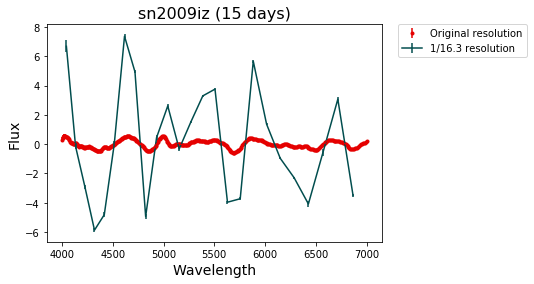

In [17]:
plt.errorbar(wvl, flux, c='xkcd:red',yerr=uncer, xerr=None,
             fmt='.', ecolor=None, elinewidth=None, capsize=None, 
             barsabove=True, lolims=False, uplims=False, xlolims=False, 
             xuplims=False, errorevery=1, capthick=None, data=None, label="Original resolution")
plt.errorbar(sxthree[0], sxthree[1], c='xkcd:dark teal',yerr = sxthree[2], 
             xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=True, 
             lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, 
             data=None, label="1/16.3 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('sn2009iz (15 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.xlim(4550, 5000)
#plt.ylim(-0.1, 0.1)
plt.show()

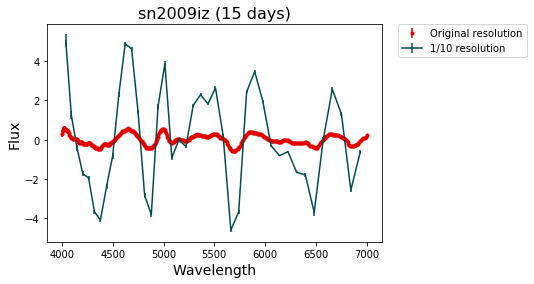

In [15]:
plt.errorbar(wvl, flux, c='xkcd:red',yerr=uncer, xerr=None,
             fmt='.', ecolor=None, elinewidth=None, capsize=None, 
             barsabove=True, lolims=False, uplims=False, xlolims=False, 
             xuplims=False, errorevery=1, capthick=None, data=None, label="Original resolution")
plt.errorbar(ten[0], ten[1], c='xkcd:dark teal',yerr = ten[2], 
             xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=True, 
             lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, 
             data=None, label="1/10 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('sn2009iz (15 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.xlim(4550, 5000)
#plt.ylim(-0.1, 0.1)
plt.show()

# Final code that reduces the resolution of any spectrum by any factor

In [ ]:
def binspec(wvl, flux, uncer, bin_factor):
    
    """
    Parameters
    ----------
    wvl : np.ndarray
        Original logspaced bin edges.
    flux : np.ndarray
        Old fluxes.
    uncer : np.ndarray
        Old uncertainties.
    bin_factor : float
        Factor to reduce original resolution by.
        
    Returns
    -------
    new_wvl : np.ndarray
        New logspaced bin edges.
    new_flux : np.ndarray
        New fluxes.
    new_uncer : np.ndarray
        New uncertainties.
    """
    
    wvllog = np.log(wvl)
    number_of_newbins = float(len(wvllog)) / bin_factor
    if float(number_of_newbins).is_integer():
        N = bin_factor - 0.000000000000001
    else:
        N = bin_factor
    integer_bin_factor = int(N)    
    integer_bin_factor_2 = int(N)
    remaining_bin_fraction = N - integer_bin_factor
    remaining_bin_fraction_2 = N - integer_bin_factor
    i = 0
    k = 0
    old_bin_length = wvllog[i + 1] - wvllog[i]
    old_bin_radius = float(old_bin_length) / 2.0
    new_bin_length = old_bin_length * N
    new_bin_radius = float(new_bin_length) / 2.0
    bin_radius_diff = new_bin_radius - old_bin_radius
    new_wvl = []
    new_flux = []
    new_uncer = []
    new_bin_center = wvllog[i] + bin_radius_diff
    new_wvl.append(np.exp(new_bin_center))
    new_flux.append(flux[i:i + integer_bin_factor].sum() + remaining_bin_fraction * flux[i + integer_bin_factor])
    new_uncer.append(np.sqrt(np.sum(np.square(uncer[i:i + integer_bin_factor])) + np.square(remaining_bin_fraction * uncer[i + integer_bin_factor])))
    while i + integer_bin_factor + (int(N - 1 + remaining_bin_fraction) + 1) <= len(wvllog) - 1:
        #print("OLD  " "i:",i + N1 + (int(N - 1 + n) + 1), "<=:",len(wvllog) - 1, "N1:",N1, "REP:", int(N - (1 - n)) + 1, "n:",n, "int(N - 1 + n):", int(N - 1 + n))
        i = i + integer_bin_factor
        k = k + integer_bin_factor_2
        integer_bin_factor = int(N - (1 - remaining_bin_fraction)) + 1
        integer_bin_factor_2 = int(N - (1 - remaining_bin_fraction_2)) + 1
        remaining_bin_fraction_2 = N - (integer_bin_factor - remaining_bin_fraction_2)
        new_bin_center +=  (1 - remaining_bin_fraction) * (wvllog[i+1] - wvllog[i])  + wvllog[i + integer_bin_factor] - wvllog[i + 1] + remaining_bin_fraction_2 * (wvllog[i + integer_bin_factor] - wvllog[i + integer_bin_factor - 1])
        new_wvl.append(np.exp(new_bin_center))
        new_flux.append((1 - remaining_bin_fraction) * flux[i] + flux[i + 1:i + integer_bin_factor].sum() + remaining_bin_fraction_2 * flux[i + integer_bin_factor])
        new_uncer.append(np.sqrt(np.square((1 - remaining_bin_fraction) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + integer_bin_factor])) + np.square(remaining_bin_fraction_2 * uncer[i + integer_bin_factor])))
        remaining_bin_fraction = N - (integer_bin_factor - remaining_bin_fraction)
    return np.array(new_wvl), np.array(new_flux), np.array(new_uncer)